In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

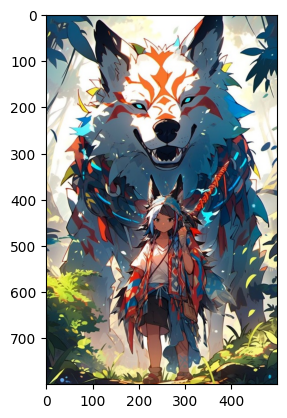

In [2]:
image = plt.imread('respon.jpg')
plt.imshow(image)

In [45]:
def colors(image, color):
    modif=np.copy(image)
    w, h, _ = image.shape

    if color == 'red':
        for x in range(w):
            for y in range(h):
                modif[x, y, 1] = 0
                modif[x, y, 2] = 0
    elif color =='green':
        for x in range(w):
            for y in range(h):
                modif[x, y, 0] = 0
                modif[x, y, 2] = 0
    elif color == 'blue':
        for x in range(w):
            for y in range(h):
                modif[x, y, 0] = 0
                modif[x, y, 1] = 0
    else:
        return None
    return modif

(-0.5, 499.5, 799.5, -0.5)

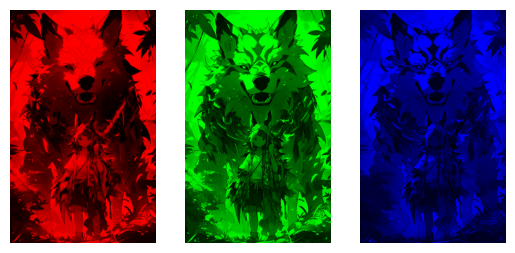

In [121]:
image = plt.imread('respon.jpg')
merah = colors(image, 'red')
hijau = colors(image, 'green')
biru = colors(image, 'blue')

plt.subplot(1, 3, 1)
plt.imshow(merah)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hijau)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(biru)
plt.axis('off')


In [119]:
def histogram(image):
    hist_red = [0] * 256
    hist_green = [0] * 256
    hist_blue = [0] * 256
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist_red[image[i, j, 0]] += 1
            hist_green[image[i, j, 1]] += 1
            hist_blue[image[i, j, 2]] += 1
    
    return hist_red, hist_green, hist_blue
hist_red, hist_green, hist_blue = histogram(image)


Text(0.5, 1.0, 'Blue Histogram')

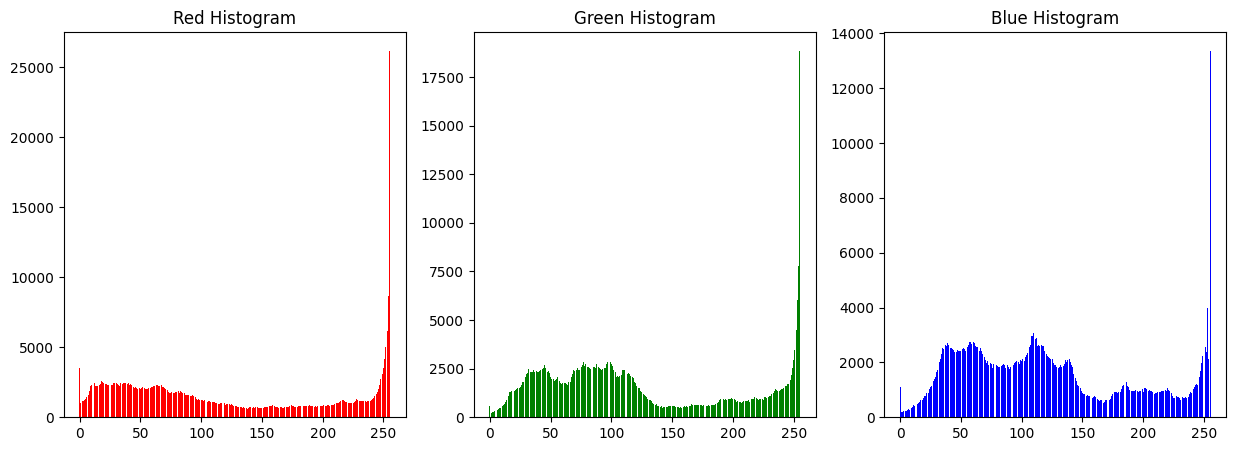

In [120]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(range(256), hist_red, color='red')
plt.title('Red Histogram')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_green, color='green')
plt.title('Green Histogram')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_blue, color='blue')
plt.title('Blue Histogram')

[[71 72 72 ... 61 60 60]
 [71 72 72 ... 61 60 60]
 [71 72 73 ... 62 61 62]
 ...
 [41 46 41 ... 45 45 46]
 [45 45 40 ... 45 45 46]
 [45 40 47 ... 45 45 46]]


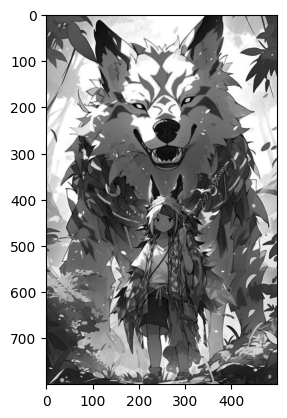

In [96]:
abu = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(abu,cmap="gray")
print(abu)

In [112]:
def minimize(image, scale_factor):
    height, width = image.shape
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    
    new_image = np.zeros((new_height, new_width), dtype=image.dtype)
    
    for x in range(new_width):
        for y in range(new_height):
            orig_x = int(x / scale_factor)
            orig_y = int(y / scale_factor)
            pixel = image[orig_y, orig_x]
            new_image[y, x] = pixel
    
    return new_image

def maximize(image, scale_factor):
    height, width = image.shape
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    
    new_image = np.zeros((new_height, new_width), dtype=image.dtype)
    
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]
            for i in range(int(x * scale_factor), int((x + 1) * scale_factor)):
                for j in range(int(y * scale_factor), int((y + 1) * scale_factor)):
                    new_image[j, i] = pixel
    
    return new_image

Text(0.5, 1.0, 'Maximized')

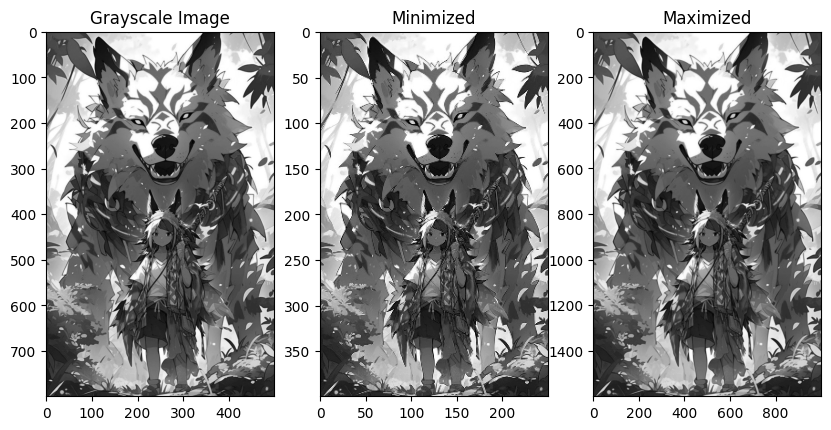

In [115]:
image = plt.imread('respon.jpg')
abu = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
minimized = minimize(abu, 0.5)
maximized = maximize(abu, 2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(abu, cmap="gray")
plt.title('Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(minimized, cmap="gray")
plt.title('Minimized')

plt.subplot(1, 3, 3)
plt.imshow(maximized, cmap="gray")
plt.title('Maximized')
